In [81]:
# Importamos las librerías que vamos a utilizar
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn import linear_model
from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split
pd.options.display.max_columns = None

### Analisis exploratorio de datos
#### Leemos el dataset y hacemos un analisis exploratorio:
- Cantidad de columnas y nombres
- Tipo de dato para cada columna
- Analizar si hay duplicados y eliminarlos
- Analizar si hay datos faltantes, en que columna y tomar criterio para eliminacion o imputación

In [82]:
df_cars=pd.read_csv('ML_cars.csv') #creamos el dataframe a partir de un dataset local

In [83]:
df_cars.head() #observamos los primeros 5 registros

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [84]:
df_cars.info() # Observamos cantidad y tipo de datos por campo

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Chequeamos si hay valores nulos

In [85]:
#Calcula la cantidad de valores nulos en cada columna
nulos_por_columna = df_cars.isnull().sum()

# Verifica si alguna columna tiene valores nulos
columnas_con_nulos = nulos_por_columna[nulos_por_columna > 0]

# Imprime las columnas con valores nulos (si las hay)
if not columnas_con_nulos.empty:
    print("Columnas con valores nulos:")
    print(columnas_con_nulos)
else:
    print("No hay valores nulos en ninguna columna.")

No hay valores nulos en ninguna columna.


#### Analizamos los registros duplicados

In [86]:
data_duplicates_df_cars =  df_cars.duplicated(subset=["car_ID"], keep="first")
print("registros duplicados en df_cars (car id): ", any(data_duplicates_df_cars))

registros duplicados en df_cars (car id):  False


#### Acondicionamiento de datos
- Reemplazamos en cylindernumber y doornumber los valores escritos por valores númericos
- Extraemos de la columna carName la marca del auto y elminamos el modelo que es muy especifico.

In [87]:
df_cars.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [88]:
inicial = ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight']
cambio= ['4','6','5','3','12','2','8']
dic = dict(zip(inicial, cambio))
# Realizar el reemplazo basado en el diccionario
df_cars['cylindernumber'] = df_cars['cylindernumber'].replace(dic)
df_cars['cylindernumber']=df_cars['cylindernumber'].astype(float)



In [89]:
inicialdoor = ['two','four']
cambiodoor= [2,4]
dicdoor = dict(zip(inicialdoor, cambiodoor))
# Realizar el reemplazo basado en el diccionario
df_cars['doornumber'] = df_cars['doornumber'].replace(dicdoor)
df_cars['doornumber']=df_cars['doornumber'].astype(float)

In [90]:
df_cars[['Marca', 'Modelo']] = df_cars['CarName'].str.split(' ', n=1, expand=True)
marcamal = ['alfa-romero','maxda','Nissan','porcshce','toyouta','vokswagen', 'volkswagen']
marcabien= ['alfa-romeo','mazda','nissan','porsche','toyota','vw','vw']
dicMarca = dict(zip(marcamal, marcabien))
# Realizar el reemplazo basado en el diccionario
df_cars['Marca'] = df_cars['Marca'].replace(dicMarca)

### Análisis descriptivo de variables numéricas
* Distribución
* Máximos y minimos para identificar si hay valores outliers
* Análisis de correlación entre features para detectar colinealidades
* Análisis de correlación entre features y Price

In [91]:
variables_numericas = df_cars[['car_ID', 'symboling', 'wheelbase', 'doornumber',
       'carlength', 'carwidth', 'carheight', 'curbweight',
       'cylindernumber', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price']]

In [92]:
variables_numericas.describe()

,car_ID,symboling,wheelbase,doornumber,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,3.121951,174.049268,65.907805,53.724878,2555.565854,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,0.994966,12.337289,2.145204,2.443522,520.680204,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,2.000000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,2.000000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,4.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,4.000000,183.100000,66.900000,55.500000,2935.000000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,4.000000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Histogramas de variables numericas

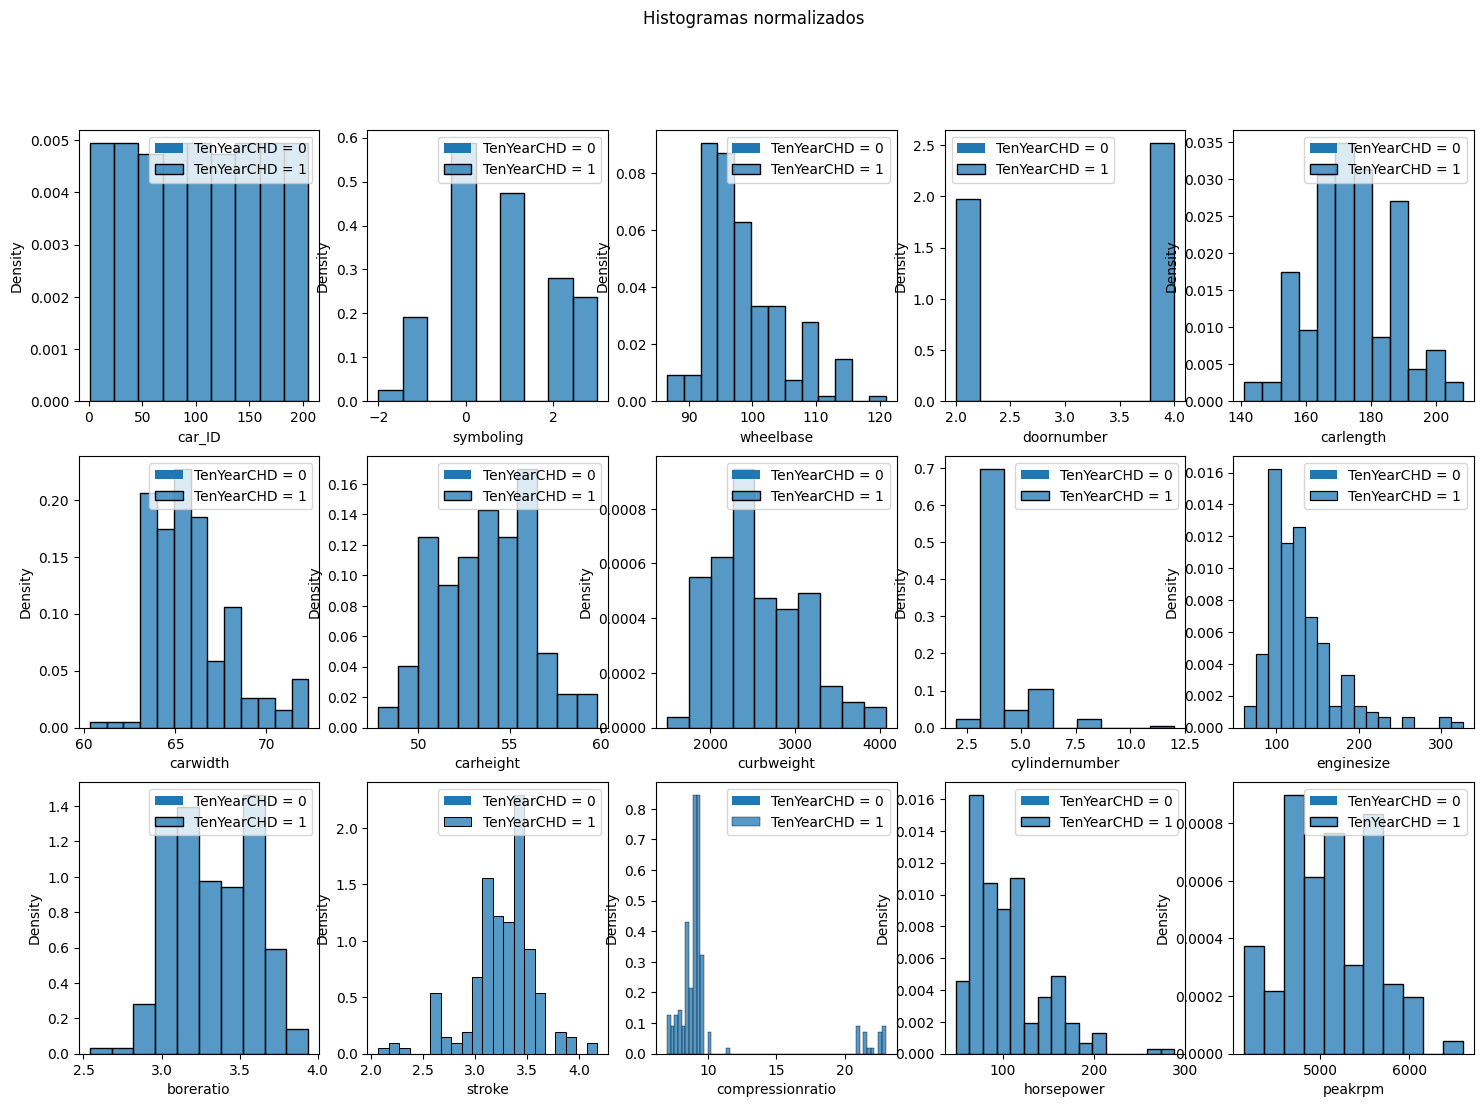

In [93]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(variables_numericas.columns[:-1], axes.flatten()):
    sns.histplot(data = variables_numericas[c], stat = 'density', ax = ax, kde = False )
    ax.legend(['TenYearCHD = 0', 'TenYearCHD = 1'])

Boxplot de variables numéricas

In [94]:
variables_numericas_box1 = df_cars[['carlength', 'enginesize', 'horsepower']]

In [95]:
variables_numericas_box2 = df_cars[[ 'wheelbase', 'carwidth', 'carheight', 'citympg', 'highwaympg']]

In [96]:
variables_numericas_box3 =  df_cars[[ 'curbweight','peakrpm']]

In [97]:
variables_numericas_box4= df_cars[['boreratio','stroke','compressionratio']]

In [98]:
listas = [variables_numericas_box1,variables_numericas_box2,variables_numericas_box3,variables_numericas_box4]

<Axes: >

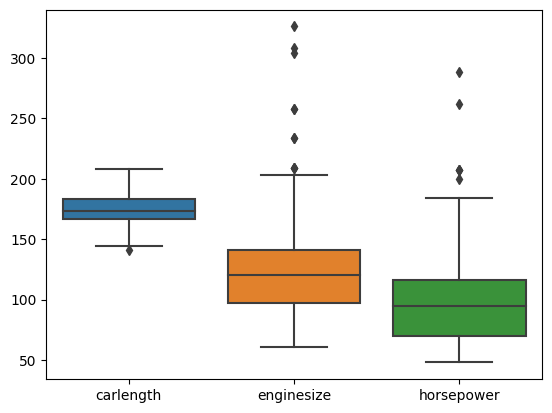

In [99]:
sns.boxplot(data=variables_numericas_box1)

<Axes: >

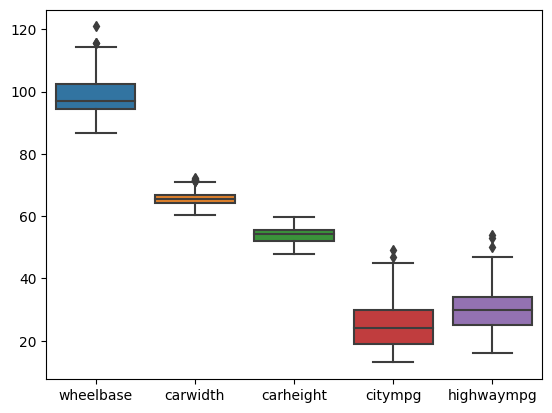

In [100]:
sns.boxplot(data=variables_numericas_box2)

<Axes: >

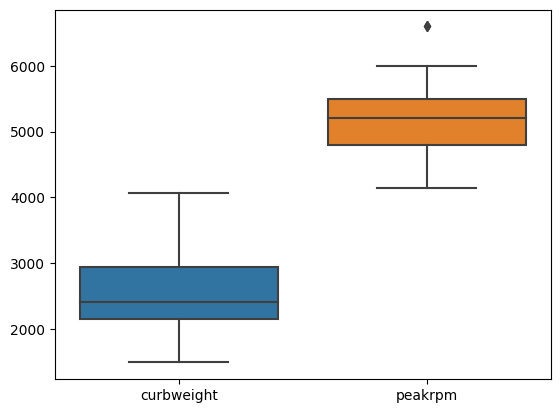

In [101]:
sns.boxplot(data=variables_numericas_box3)

<Axes: >

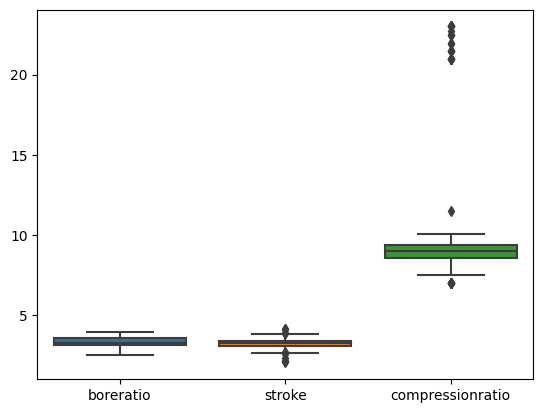

In [102]:
sns.boxplot(data=variables_numericas_box4)

Heatmap (Pearson) para identificar correlaciones entre features y features y target.

In [103]:
corr_variables_numericas = variables_numericas.corr()

<Axes: >

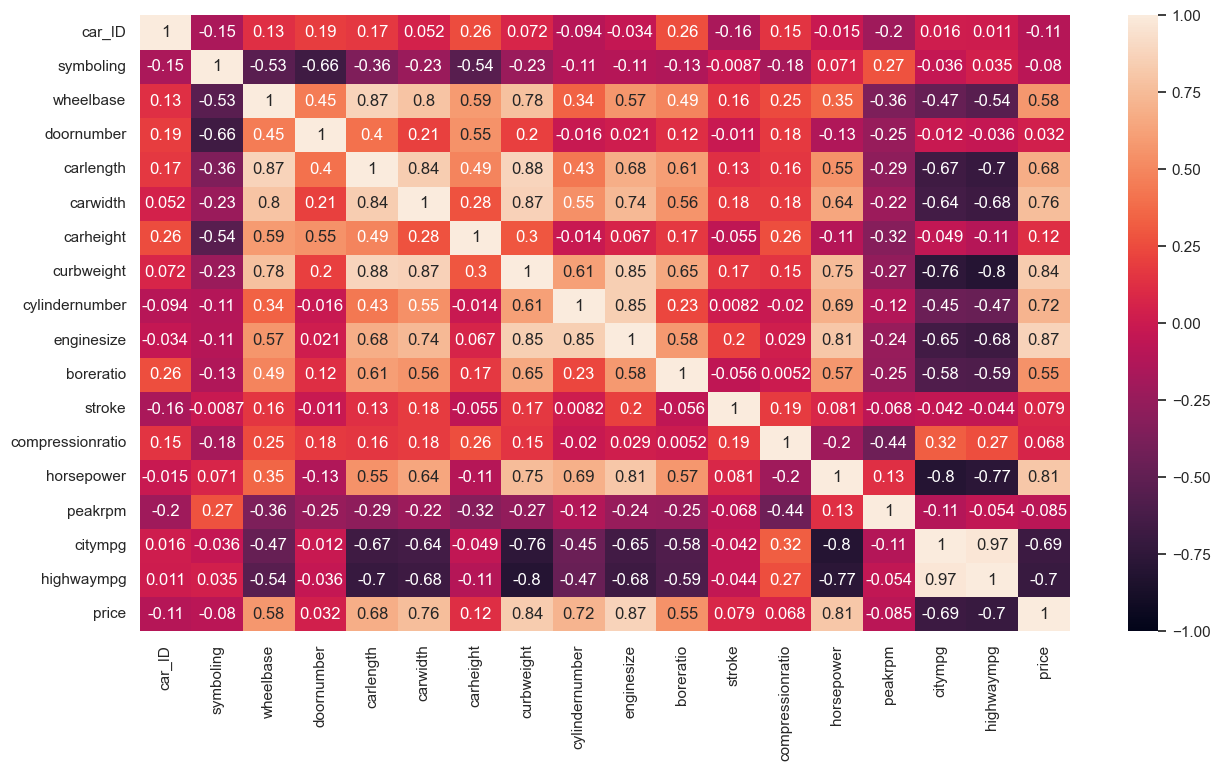

In [104]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr_variables_numericas,annot=True, vmax=1,vmin=-1)

##### Se observa correlación entre las siguientes features:
- carlength y wheelbase
- curbweigh, engine size, cylindernumber
##### Las 5 features más correlacionadas con el precio:
- 1- 'enginesize'
- 2- 'curbweight'
- 3- 'horsepower' 
- 4- 'carwidth'
- 5-  'cylindernumber'

### Análisis descriptivo de variables categóricas

In [105]:
variables_categoricas =['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
        'fuelsystem','Marca']

fueltype
gas       185
diesel     20
Name: count, dtype: int64


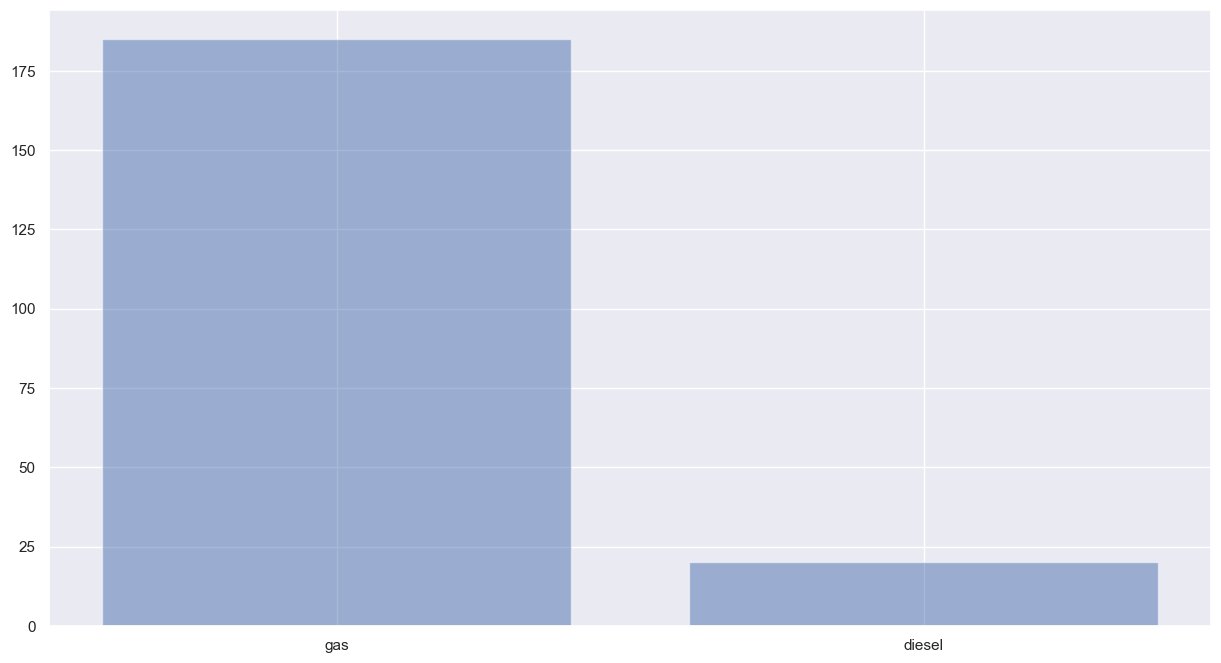

aspiration
std      168
turbo     37
Name: count, dtype: int64


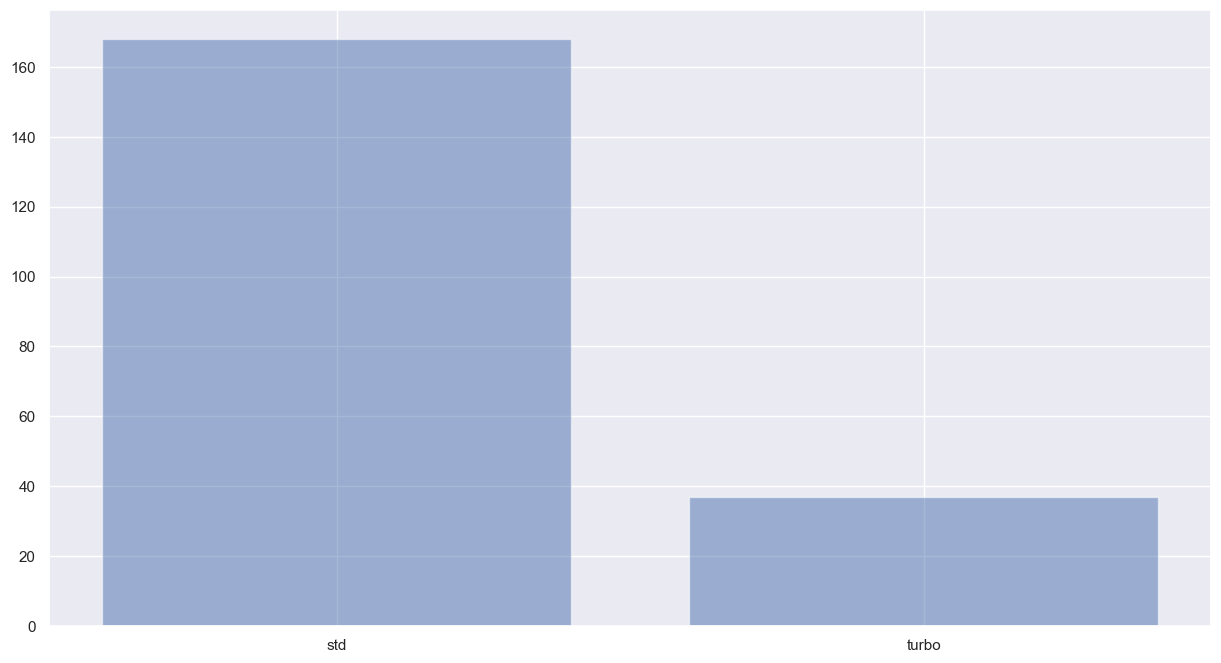

carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64


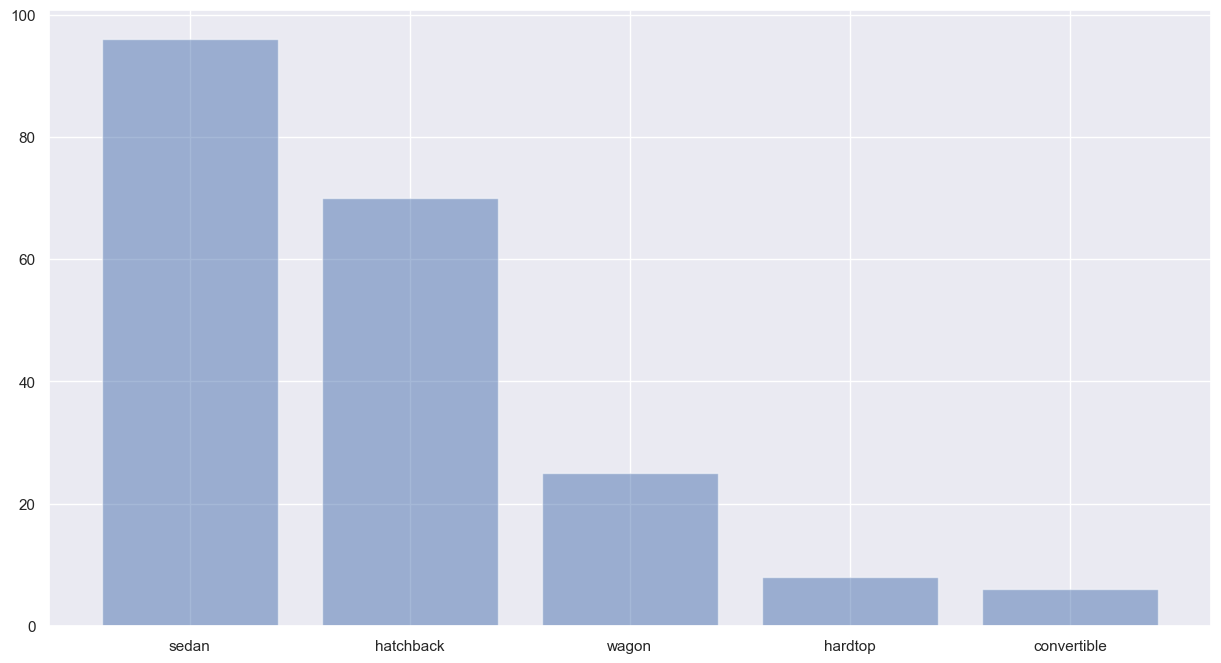

drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64


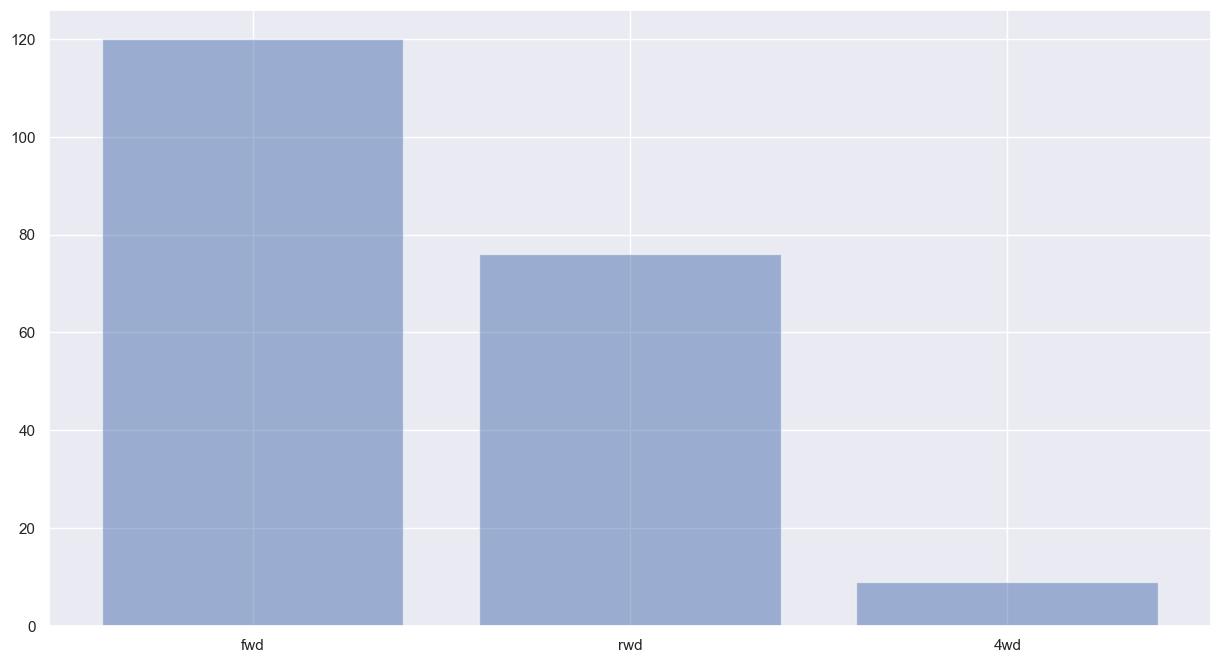

enginelocation
front    202
rear       3
Name: count, dtype: int64


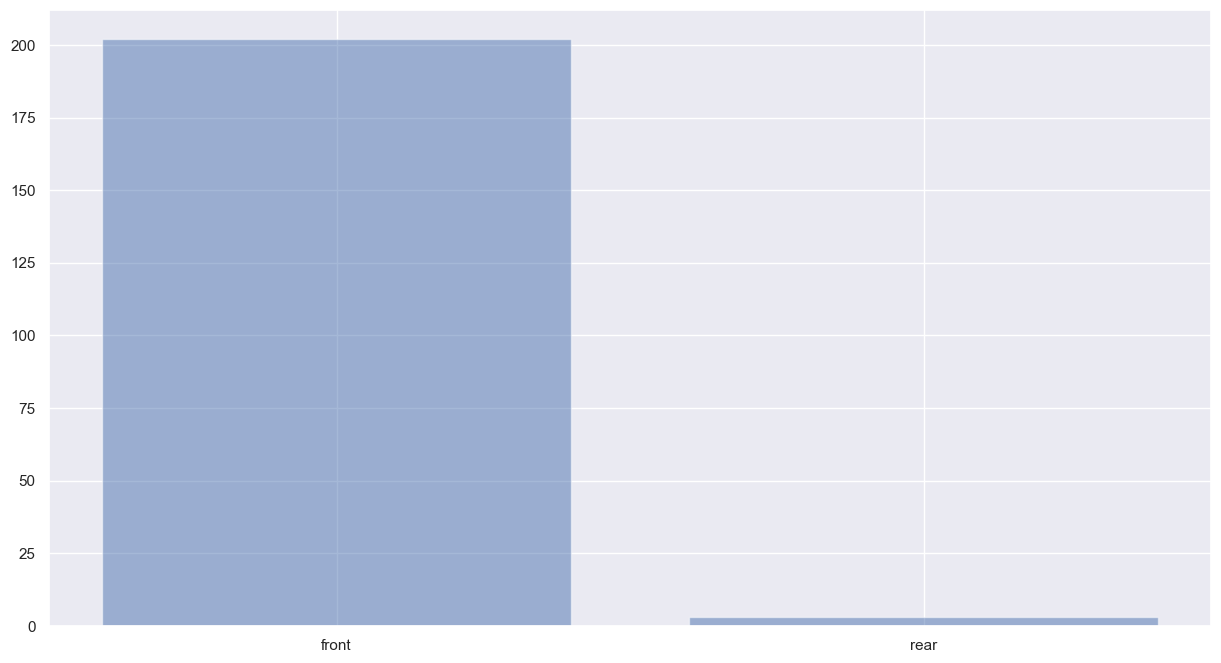

enginetype
ohc      148
ohcf      15
ohcv      13
dohc      12
l         12
rotor      4
dohcv      1
Name: count, dtype: int64


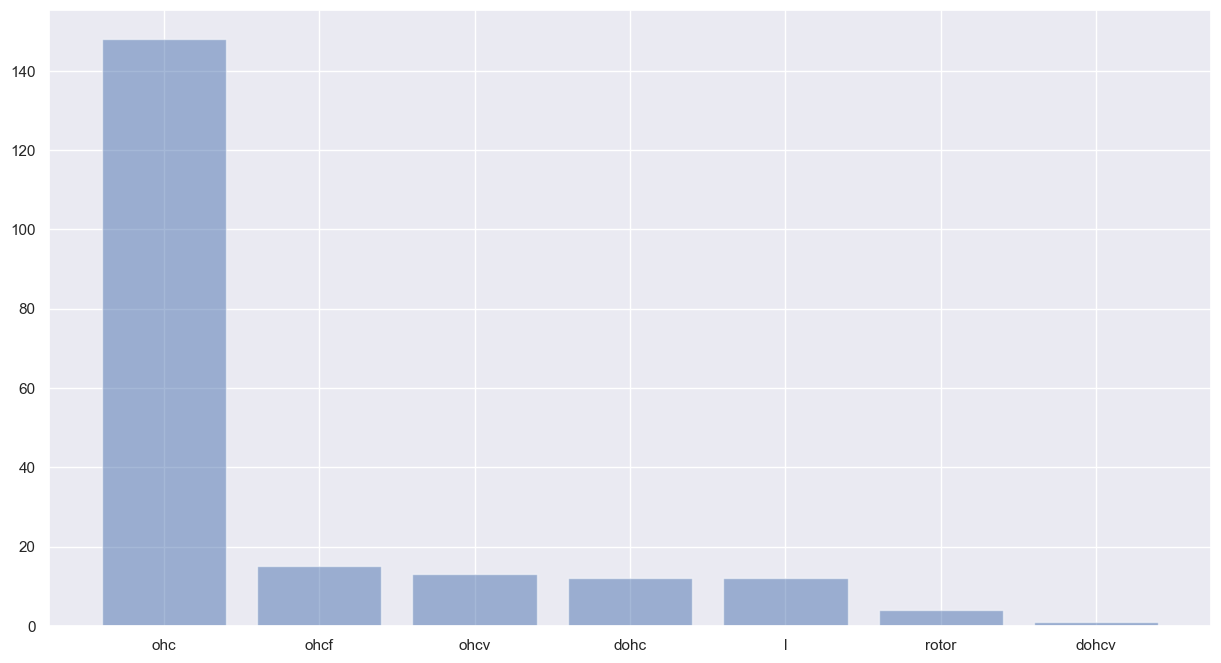

fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


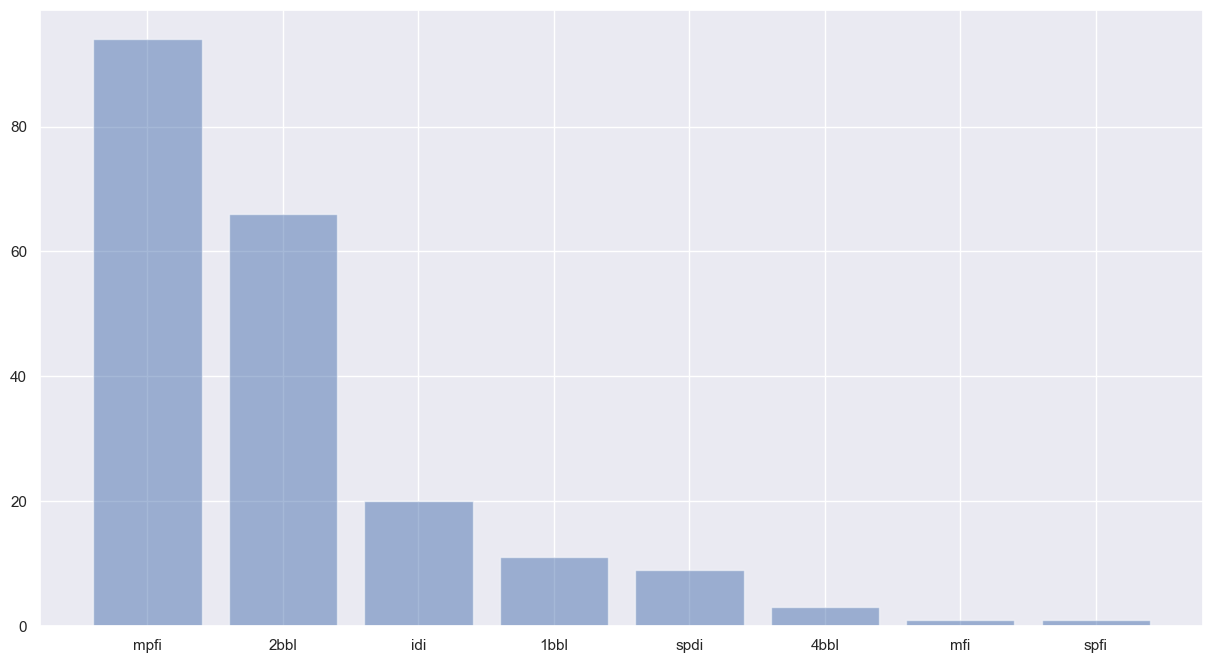

Marca
toyota        32
nissan        18
mazda         17
mitsubishi    13
honda         13
vw            12
subaru        12
peugeot       11
volvo         11
dodge          9
buick          8
bmw            8
audi           7
plymouth       7
saab           6
porsche        5
isuzu          4
jaguar         3
chevrolet      3
alfa-romeo     3
renault        2
mercury        1
Name: count, dtype: int64


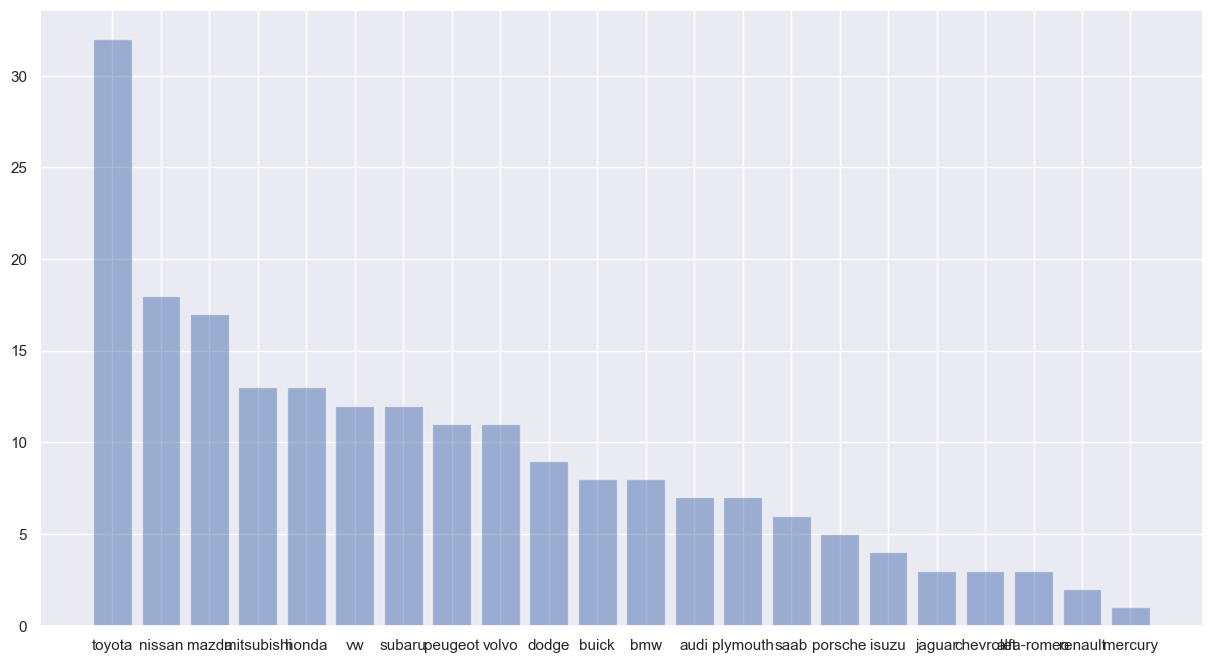

In [106]:
for category in variables_categoricas:
    print(df_cars[category].value_counts())
    plt.bar(df_cars[category].value_counts().index, df_cars[category].value_counts().values, color='b',\
            alpha=0.5)
    plt.show()

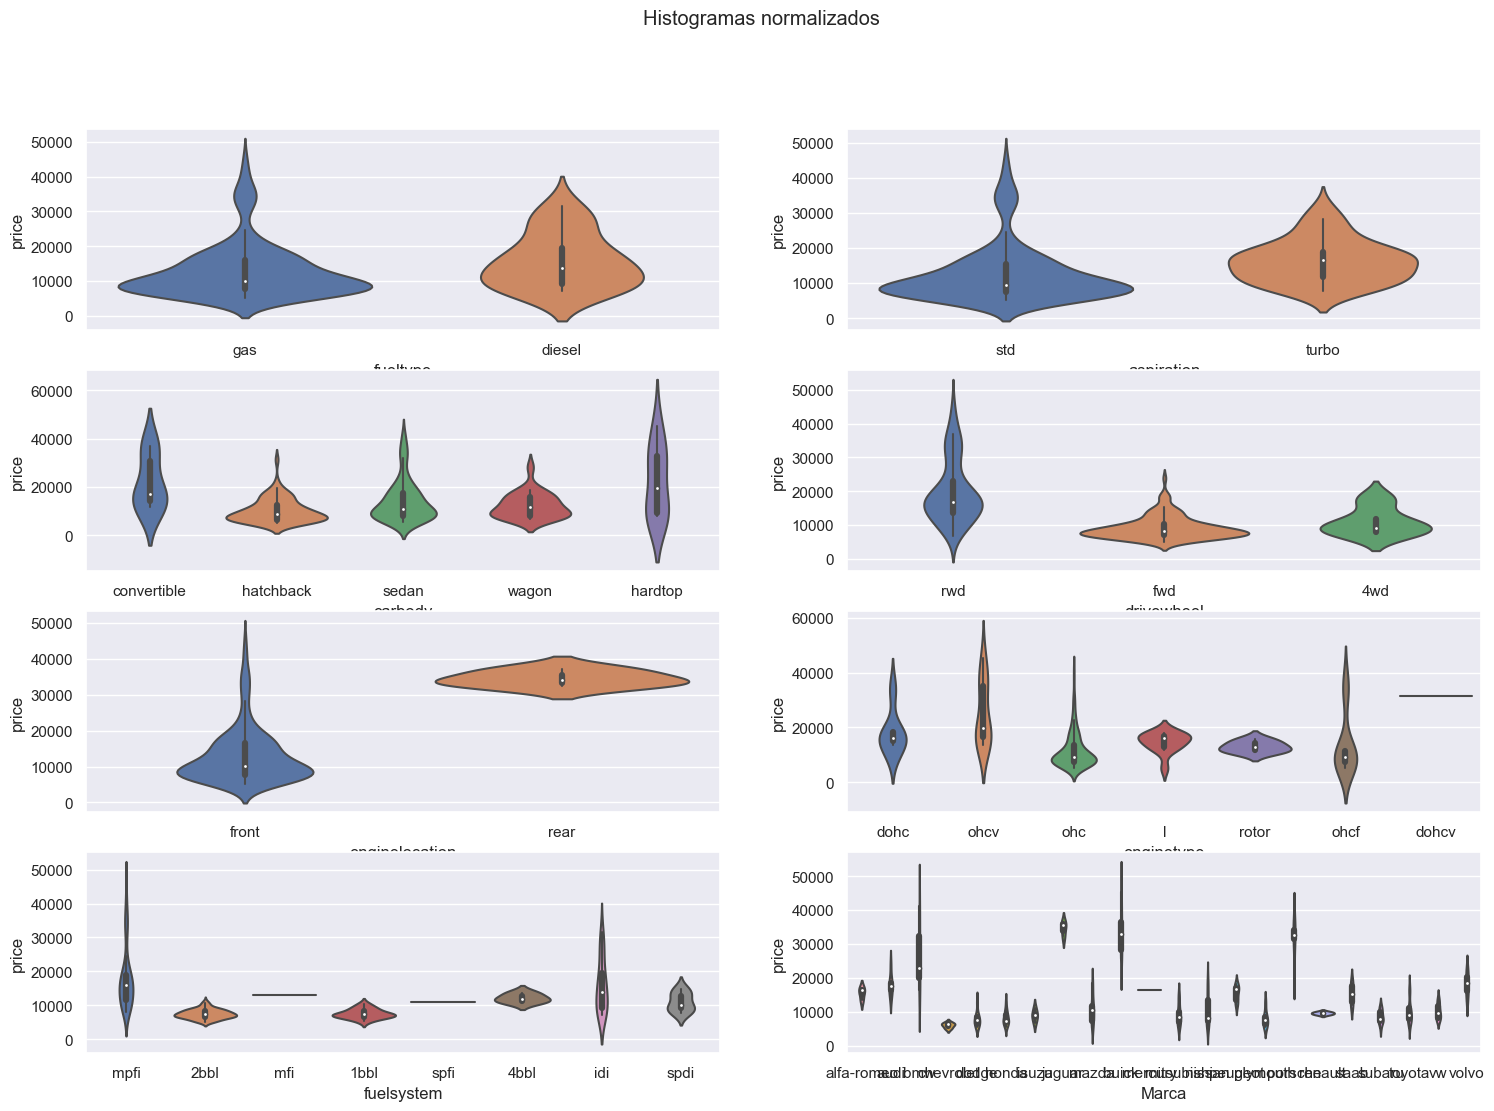

In [107]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18,12))
fig.suptitle('Histogramas normalizados')
for c, ax in zip(variables_categoricas, axes.flatten()):
    sns.violinplot(data= df_cars, ax = ax, x=c, y='price')

De los graficos se observa que las variables que afectan mas sobre el precio del auto son:  'enginelocation','Marca'

#### Preparación de datos

Creación de variables dummies

In [127]:
dfCars= pd.get_dummies( df_cars,columns=variables_categoricas, 
                            drop_first = True, dtype=int)

In [110]:
dfCars

,car_ID,symboling,CarName,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Modelo,fueltype_gas,aspiration_turbo,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,Marca_audi,Marca_bmw,Marca_buick,Marca_chevrolet,Marca_dodge,Marca_honda,Marca_isuzu,Marca_jaguar,Marca_mazda,Marca_mercury,Marca_mitsubishi,Marca_nissan,Marca_peugeot,Marca_plymouth,Marca_porsche,Marca_renault,Marca_saab,Marca_subaru,Marca_toyota,Marca_volvo,Marca_vw
0,1,3,alfa-romero giulia,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,13495.0,giulia,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,3,alfa-romero stelvio,2.0,88.6,168.8,64.1,48.8,2548,4.0,130,3.47,2.68,9.0,111,5000,21,27,16500.0,stelvio,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,1,alfa-romero Quadrifoglio,2.0,94.5,171.2,65.5,52.4,2823,6.0,152,2.68,3.47,9.0,154,5000,19,26,16500.0,Quadrifoglio,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2,audi 100 ls,4.0,99.8,176.6,66.2,54.3,2337,4.0,109,3.19,3.40,10.0,102,5500,24,30,13950.0,100 ls,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2,audi 100ls,4.0,99.4,176.6,66.4,54.3,2824,5.0,136,3.19,3.40,8.0,115,5500,18,22,17450.0,100ls,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),4.0,109.1,188.8,68.9,55.5,2952,4.0,141,3.78,3.15,9.5,114,5400,23,28,16845.0,145e (sw),1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
201,202,-1,volvo 144ea,4.0,109.1,188.8,68.8,55.5,3049,4.0,141,3.78,3.15,8.7,160,5300,19,25,19045.0,144ea,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
202,203,-1,volvo 244dl,4.0,109.1,188.8,68.9,55.5,3012,6.0,173,3.58,2.87,8.8,134,5500,18,23,21485.0,244dl,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
203,204,-1,volvo 246,4.0,109.1,188.8,68.9,55.5,3217,6.0,145,3.01,3.40,23.0,106,4800,26,27,22470.0,246,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [128]:
dfCars.columns

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Modelo', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Marca_audi', 'Marca_bmw',
       'Marca_buick', 'Marca_chevrolet', 'Marca_dodge', 'Marca_honda',
       'Marca_isuzu', 'Marca_jaguar', 'Marca_mazda', 'Marca_mercury',
       'Marca_mitsubishi', 'Marca_nissan', 'Marca_peugeot', 'Marca_plymouth',
       '

### Modelo de Regresión lineal para predicción del precio del auto

In [139]:
dfCars.columns

Index(['car_ID', 'symboling', 'CarName', 'doornumber', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Modelo', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Marca_audi', 'Marca_bmw',
       'Marca_buick', 'Marca_chevrolet', 'Marca_dodge', 'Marca_honda',
       'Marca_isuzu', 'Marca_jaguar', 'Marca_mazda', 'Marca_mercury',
       'Marca_mitsubishi', 'Marca_nissan', 'Marca_peugeot', 'Marca_plymouth',
       '

In [152]:
# Creamos X e y
feature_cols = ['symboling','doornumber',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'cylindernumber',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'fueltype_gas',
       'aspiration_turbo', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'Marca_audi', 'Marca_bmw',
       'Marca_buick', 'Marca_chevrolet', 'Marca_dodge', 'Marca_honda',
       'Marca_isuzu', 'Marca_jaguar', 'Marca_mazda', 'Marca_mercury',
       'Marca_mitsubishi', 'Marca_nissan', 'Marca_peugeot', 'Marca_plymouth',
       'Marca_porsche', 'Marca_renault', 'Marca_saab', 'Marca_subaru',
       'Marca_toyota', 'Marca_volvo', 'Marca_vw']

In [153]:
# Generamos matriz de features y precio
X = dfCars[feature_cols]
y = dfCars.price

In [154]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn import metrics

#### Modelo de regresión Lineal

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=42) 
modelo_l = linear_model.LinearRegression()
modelo_l.fit(X_train, y_train)

y_pred=modelo_l.predict(X_test)
print ('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print ('MSE:', metrics.mean_squared_error(y_test, y_pred))
print ('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print ('R2:', metrics.r2_score(y_test, y_pred))

MAE: 1939.7137328373751
MSE: 8427928.713945473
RMSE: 2903.0895118727344
R2: 0.8783574467596702


#### Modelo de regresión lineal con cross validation

In [163]:
def regresion(feature_cols):

    X = dfCars[feature_cols]
    y = dfCars.price
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
 
    linreg = linear_model.LinearRegression()
 
    linreg.fit(X_train, y_train)
 
    score = linreg.score(X_train,y_train)
    
    kf = KFold(n_splits=7, shuffle=True, random_state=68)
 
    cv_scores = cross_val_score(linreg, X_train, y_train, cv=kf)
    
    cv_scores = [round(num, 3) for num in cv_scores]
    print('Se obtienen los siguientes coeficientes de determinación con cross validation:')
    print(cv_scores)
    print(f'Max R-Squared: {max(cv_scores)}')
    print(f'Min R-Squared: {min(cv_scores)}')
    print('Promedio R-Squared: {:.3f}'.format(np.mean(cv_scores)))
    print('Desviación Estándar: {:.3f}'.format(np.std(cv_scores)))
    print(f'Intervalo de confianza 95%: {np.quantile(cv_scores, [0.025, 0.975])}', '\n')
 
    y_pred = linreg.predict(X_test)
    print ('Metricas en Test')
    print ('Test MAE:', metrics.mean_absolute_error(y_test, y_pred))
    print ('Test MSE:', metrics.mean_squared_error(y_test, y_pred))
    print ('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print ('test R2:', metrics.r2_score(y_test, y_pred))

In [164]:
regresion(feature_cols)

Se obtienen los siguientes coeficientes de determinación con cross validation:
[0.804, 0.906, 0.876, 0.883, 0.922, 0.947, 0.935]
Max R-Squared: 0.947
Min R-Squared: 0.804
Promedio R-Squared: 0.896
Desviación Estándar: 0.045
Intervalo de confianza 95%: [0.8148 0.9452] 

Metricas en Test
Test MAE: 2012.061161327892
Test MSE: 10075861.02248583
Test RMSE: 3174.249678662003
test R2: 0.8698484241073758


##### Conclusiones:
Tanto en el modelo de regresion lineal múltiple como en el modelo con regularización se obtuvieron valores de R2 muy buenos. Por lo tanto, podemos aseverar que ambos modelon tienen buena perfomance y pueden arrojar buenas predicciones de precios para los vehículos que se analicen.

#### Modelo de CLASIFICACIÓN para identificar si un vehículo es de gama alta o baja


In [165]:
dfCars_cl=dfCars

In [172]:
#obtenemos la mediana del precio
medianaPrice=dfCars_cl['price'].median()
medianaPrice

10295.0

In [167]:
condicion = lambda x: '1' if x > medianaPrice else '0'
dfCars_cl['gama'] = dfCars_cl.apply(lambda x: '1' if x['price']>medianaPrice else '0',axis=1)

In [168]:
X = dfCars[feature_cols]
y = dfCars.gama

Importamos las librerias necesarias para probar 3 modelos:
- Regresión logística
- Vecinos Cercanos
- Árbol de decisión

In [173]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.preprocessing import normalize

In [170]:
# generamos los datos train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [171]:
# Utilizamos sklearn para estandarizar la matriz de Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

Para analizar la performance de los 3 modelos vamos a:
- Realizar dos listas, una con los estimadores de los modelos y otra con la grid de parámetros a estimar en cada modelo.Luego iteraramos sobre esas listas para estimar los hiperparámetros de los modelos

In [174]:
models = [LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier()]

In [175]:
params = [
    {'C': [1, 10, 100, 1000],
     'penalty': ['l1', 'l2',],
     'solver': ['saga']},
    {'n_neighbors': range(1,50),
     'weights' : ['uniform', 'distance'],
     'p' : [1, 2, 3]},
    { "criterion" : ["gini", "entropy"],
      "min_samples_leaf": [5,10,15,20,None], 
      "max_depth" : [1,3,4,5,8,9,10,11,12,13,14,None],
      "min_samples_split": [2, 3, 4,None]}
]

In [176]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [177]:
grids = []
for i in range(len(models)):
    gs = GridSearchCV(estimator=models[i], param_grid=params[i], scoring='accuracy', cv=folds, n_jobs=4)
    print (gs)
    fit = gs.fit(X_train, y_train)
    grids.append(fit)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=LogisticRegression(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000], 'penalty': ['l1', 'l2'],
                         'solver': ['saga']},
             scoring='accuracy')


c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=KNeighborsClassifier(), n_jobs=4,
             param_grid={'n_neighbors': range(1, 50), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')
GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 3, 4, 5, 8, 9, 10, 11, 12, 13, 14,
                                       None],
                         'min_samples_leaf': [5, 10, 15, 20, None],
                         'min_samples_split': [2, 3, 4, None]},
             scoring='accuracy')


c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1920 fits failed out of a total of 4800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
960 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Py

In [178]:
# Analizamos lás métricas obtenidas
for i in grids:
    print (i.best_score_)
    print (i.best_estimator_)
    print (i.best_params_)

0.9389705882352942
LogisticRegression(C=1, solver='saga')
{'C': 1, 'penalty': 'l2', 'solver': 'saga'}
0.9202205882352942
KNeighborsClassifier(n_neighbors=3, p=1)
{'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
0.9205882352941177
DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


Analizamos los resultados de la validación cruzada para obtención la hiperparámetros

In [179]:
pd.DataFrame(grids[0].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.015147,0.002335,0.001155,0.000710,1,l1,saga,"{'C': 1, 'penalty': 'l1', 'solver': 'saga'}",0.941176,1.0,0.941176,0.882353,0.8750,1.0000,0.9375,1.0,0.8125,0.8750,0.926471,0.060834,6
1,0.010039,0.001410,0.000863,0.000488,1,l2,saga,"{'C': 1, 'penalty': 'l2', 'solver': 'saga'}",0.941176,1.0,0.941176,0.882353,0.9375,0.9375,1.0000,1.0,0.8125,0.9375,0.938971,0.055127,1
2,0.012459,0.002456,0.000801,0.000401,10,l1,saga,"{'C': 10, 'penalty': 'l1', 'solver': 'saga'}",0.941176,1.0,0.941176,0.882353,0.9375,0.9375,0.9375,1.0,0.8125,0.9375,0.932721,0.051261,2
3,0.009944,0.002010,0.000945,0.000336,10,l2,saga,"{'C': 10, 'penalty': 'l2', 'solver': 'saga'}",0.941176,1.0,0.941176,0.882353,0.8750,0.9375,0.9375,1.0,0.8125,0.9375,0.926471,0.054033,6
4,0.012240,0.001664,0.001101,0.000481,100,l1,saga,"{'C': 100, 'penalty': 'l1', 'solver': 'saga'}",0.941176,1.0,0.941176,0.882353,0.9375,0.9375,0.9375,1.0,0.8125,0.9375,0.932721,0.051261,2
5,0.009530,0.002027,0.000782,0.000676,100,l2,saga,"{'C': 100, 'penalty': 'l2', 'solver': 'saga'}",0.941176,1.0,0.941176,0.882353,0.9375,0.9375,0.9375,1.0,0.8125,0.9375,0.932721,0.051261,2
6,0.011948,0.002383,0.000902,0.000661,1000,l1,saga,"{'C': 1000, 'penalty': 'l1', 'solver': 'saga'}",0.941176,1.0,0.941176,0.882353,0.9375,0.9375,0.9375,1.0,0.8125,0.9375,0.932721,0.051261,2
7,0.010099,0.002479,0.000898,0.000736,1000,l2,saga,"{'C': 1000, 'penalty': 'l2', 'solver': 'saga'}",0.941176,1.0,0.941176,0.882353,0.8750,0.9375,0.9375,1.0,0.8125,0.9375,0.926471,0.054033,6


In [180]:
pd.DataFrame(grids[1].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000702,0.000460,0.034028,0.039996,1,1,uniform,"{'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}",0.941176,0.941176,0.882353,0.823529,0.8750,1.0000,0.9375,1.0000,0.8125,0.9375,0.915074,0.061945,2
1,0.001184,0.000732,0.002669,0.000877,1,1,distance,"{'n_neighbors': 1, 'p': 1, 'weights': 'distance'}",0.941176,0.941176,0.882353,0.823529,0.8750,1.0000,0.9375,1.0000,0.8125,0.9375,0.915074,0.061945,2
2,0.000931,0.000347,0.002790,0.000817,1,2,uniform,"{'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}",0.941176,0.941176,0.941176,0.764706,0.6875,1.0000,0.8750,1.0000,0.8125,0.9375,0.890074,0.098615,90
3,0.000543,0.000537,0.003458,0.000867,1,2,distance,"{'n_neighbors': 1, 'p': 2, 'weights': 'distance'}",0.941176,0.941176,0.941176,0.764706,0.6875,1.0000,0.8750,1.0000,0.8125,0.9375,0.890074,0.098615,90
4,0.000819,0.000687,0.003346,0.000725,1,3,uniform,"{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}",0.941176,0.941176,0.941176,0.705882,0.6875,1.0000,0.8750,1.0000,0.7500,0.8750,0.871691,0.111203,145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,0.000672,0.000583,0.002720,0.000847,49,1,distance,"{'n_neighbors': 49, 'p': 1, 'weights': 'distan...",0.941176,0.882353,0.941176,0.882353,0.8125,0.9375,0.9375,1.0000,0.8125,0.9375,0.908456,0.057298,21
290,0.000876,0.000515,0.002696,0.000801,49,2,uniform,"{'n_neighbors': 49, 'p': 2, 'weights': 'uniform'}",0.941176,0.882353,0.941176,0.823529,0.6875,0.8125,0.7500,0.8750,0.8125,0.8750,0.840074,0.076064,242
291,0.000746,0.000398,0.002945,0.000894,49,2,distance,"{'n_neighbors': 49, 'p': 2, 'weights': 'distan...",0.941176,0.882353,0.882353,0.823529,0.7500,0.9375,0.8750,0.9375,0.6875,0.9375,0.865441,0.082899,164
292,0.000784,0.000526,0.003388,0.000908,49,3,uniform,"{'n_neighbors': 49, 'p': 3, 'weights': 'uniform'}",0.882353,0.764706,0.882353,0.823529,0.6250,0.7500,0.6875,0.7500,0.6875,0.8750,0.772794,0.086327,284


In [181]:
pd.DataFrame(grids[2].cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002104,0.003013,0.001629,0.001606,gini,1,5,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.823529,0.882353,0.823529,0.882353,0.8125,0.875,0.8125,0.9375,0.75,0.8125,0.841176,0.050216,232
1,0.001202,0.000469,0.000796,0.000398,gini,1,5,3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.823529,0.882353,0.823529,0.882353,0.8125,0.875,0.8125,0.9375,0.75,0.8125,0.841176,0.050216,232
2,0.001153,0.000448,0.000824,0.000473,gini,1,5,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.823529,0.882353,0.823529,0.882353,0.8125,0.875,0.8125,0.9375,0.75,0.8125,0.841176,0.050216,232
3,0.000301,0.000460,0.000000,0.000000,gini,1,5,None,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
4,0.001191,0.000715,0.000459,0.000480,gini,1,10,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.823529,0.882353,0.823529,0.882353,0.8125,0.875,0.8125,0.9375,0.75,0.8125,0.841176,0.050216,232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.000200,0.000400,0.000000,0.000000,entropy,None,20,None,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
476,0.000327,0.000670,0.000000,0.000000,entropy,None,None,2,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
477,0.000257,0.000528,0.000000,0.000000,entropy,None,None,3,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289
478,0.000412,0.000553,0.000000,0.000000,entropy,None,None,4,"{'criterion': 'entropy', 'max_depth': None, 'm...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,289


Probamos los modelos con los datos de x_test para evaluar la performance

In [194]:
X_test = scaler.transform(X_test)

c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [195]:
y_preds_log = grids[0].predict(X_test)
y_preds_knn = grids[1].predict(X_test)
y_preds_tree = grids[2].predict(X_test)

In [210]:
print ("Resultado Regresión Logística:")
print (classification_report(y_test, y_preds_log))

Resultado Regresión Logística:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        26
           1       0.62      0.67      0.65        15

    accuracy                           0.73        41
   macro avg       0.71      0.72      0.71        41
weighted avg       0.74      0.73      0.73        41



In [212]:
confusion_matrix(y_test, y_preds_log)

array([[20,  6],
       [ 5, 10]], dtype=int64)

In [213]:
print ("Resultado Regresión KNN:")
print (classification_report(y_test, y_preds_knn))

Resultado Regresión KNN:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83        26
           1       0.68      0.87      0.76        15

    accuracy                           0.80        41
   macro avg       0.80      0.82      0.80        41
weighted avg       0.83      0.80      0.81        41



In [199]:
confusion_matrix(y_test, y_preds_knn)

array([[20,  6],
       [ 2, 13]], dtype=int64)

In [214]:
print ("Resultado Árbol de decisión:")
print (classification_report(y_test, y_preds_tree))

Resultado Árbol de decisión:
              precision    recall  f1-score   support

           0       0.63      1.00      0.78        26
           1       0.00      0.00      0.00        15

    accuracy                           0.63        41
   macro avg       0.32      0.50      0.39        41
weighted avg       0.40      0.63      0.49        41



c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\LENOVO IDEAPAD\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this beh

In [201]:
confusion_matrix(y_test, y_preds_tree)

array([[26,  0],
       [15,  0]], dtype=int64)

#### Conclusiones:
- Se compararon 3 modelos de clasificación : regresión logística, Knn y árbol de decisión.
- Como las clases estan balanceadas el accurancy resulta una buena métrica para la evaluación. 
- El modelo KNN es el que presenta el valor de accurancy mas alto de 0.8